# Introduction

<div style="text-align:justify">Spotify is one of largest entertainment platform which provides streaming song from around the world. Each song has certain attributes and characteristics. Attributes of the song included the name of singer, song name, level of popularity, and release date. The characteristics of song depends on its features, such as acousticness,energy,danceability,instrumentalness,liveness,loudness,speechiness,tempo, dan valence.<div>
<div style="text-align:justify">Singer and music producer will consider the various characteristics and attributes in popular songs when they will create a new song.</div> 
<div style="text-align:justify">In this article, we will analyze the song's popularity level in 2020 based on the existing characteristics in each song. The sample data used is the Top 50 song data in 2020 obtained from the collect API results from Spotify developer.</div>


<h2>Collect Data from Spotify with Open API</h2>

In [273]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
import matplotlib.pyplot as plt #visualization package
import seaborn as sns #visualization package
import numpy as np
from pandas.plotting import scatter_matrix

In [274]:
client_id = '914ec07716fd444ea85366923a92343c'
client_secret = 'ae374177ae15466e93fa4392849c9ce8'

In [275]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API
print(sp)

In [276]:
id_playlist = '37i9dQZEVXbMDoHDwVN2tF'
result = sp.playlist_tracks(id_playlist)

In [277]:
details_artist = result['items']

<h4>Get Song's Attributes</h4>

In [278]:
#get attributes inside items
spotify_name_song = []
spotify_uri_song = []
spotify_release_date = []
spotify_popularity = []
spotify_name_artist =[]

for i in details_artist:
    spotify_name_song.append(i['track']['name'])
    spotify_uri_song.append(i['track']['uri'])
    spotify_release_date.append(i['track']['album']['release_date'])
    spotify_popularity.append(i['track']['popularity'])
    spotify_name_artist.append(i['track']['artists'])

In [279]:
artist_name = []
for n in spotify_name_artist:
    artist_name.append(n[0]['name'])

<h4>Get Song Features/Characteristic</h4>

In [280]:
spotify_acousticness = []
spotify_danceability = []
spotify_energy = []
spotify_instrumentalness = []
spotify_liveness = []
spotify_loudness = []
spotify_speechiness = []
spotify_tempo = []
spotify_valence = []

for i in spotify_uri_song:
    features = sp.audio_features(spotify_uri_song)
    for x in features:
        spotify_acousticness.append(x['acousticness'])
        spotify_danceability.append(x['danceability'])
        spotify_energy.append(x['energy'])
        spotify_instrumentalness.append(x['instrumentalness'])
        spotify_liveness.append(x['liveness'])
        spotify_loudness.append(x['loudness'])
        spotify_speechiness.append(x['speechiness'])
        spotify_tempo.append(x['tempo'])
        spotify_valence.append(x['valence'])

In [281]:
import pandas as pd

df = pd.DataFrame(list(zip(spotify_name_song,artist_name,spotify_release_date,spotify_popularity,
                          spotify_acousticness,spotify_danceability,spotify_energy,spotify_instrumentalness,spotify_liveness,spotify_loudness,spotify_speechiness,spotify_tempo,spotify_valence)),
                 columns=['song_name','artist_name','release_date','popularity','acousticness','danceability','energy','instrumentalness','liveness',
                         'loudness','speechiness','tempo','valence'])

<h4>Saving Data Into CSV File</h4>

In [282]:
df.to_csv("Spotify Data.csv", header=True, index=False)

# Exploratory Data Analysis (EDA)

<div style="text-align:justify">After collect the data from the open API, the next step is to explore, analyze and visualize the data. It aims to geting the insight and information about popular music in 2020 to produce output in the form of information that is useful for readers, especially music producer.</div>

<h2>Data Wrangling</h2>

<h4>Get Dimensions and Sizes of the Data</h4>

In [283]:
df = pd.read_csv("Spotify Data.csv")

In [284]:
#check size and dimension of data
print(df.shape)
print(df.size)


(50, 13)
650


In [285]:
df.head(5)

,song_name,artist_name,release_date,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Blinding Lights,The Weeknd,2019-11-29,100,0.001,0.513,0.796,0.000,0.094,-4.075,0.063,171.017,0.345
1,The Box,Roddy Ricch,2019-12-06,99,0.104,0.896,0.586,0.000,0.790,-6.687,0.056,116.971,0.642
2,Dance Monkey,Tones And I,2019-05-10,75,0.688,0.825,0.593,0.000,0.170,-6.401,0.099,98.078,0.540
3,Don't Start Now,Dua Lipa,2019-10-31,97,0.013,0.794,0.793,0.000,0.095,-4.521,0.084,123.941,0.677
4,Intentions (feat. Quavo),Justin Bieber,2020-02-14,89,0.300,0.806,0.546,0.000,0.102,-6.637,0.058,147.986,0.874


From the result above we get information about the size and dimension of the data. There are 50 rows and 13 columns which contains different information in each columns. Here below detail of columns information :
* `song_name` : the name of song
* `artist_name` : the name of singer in each song
* `release_date` : song released date
* `popularity` : popularity levels in each song
* `acousticness` : confidence measure whether the track is acoustic. The higher the value, more acoustic the song.
* `danceability` : describes how suitable a track is for dancing. The higher the value, the easier it is to dance to this song.
* `energy` : energic levels of a song. The higher the value, more energic of the song.
* `instrumentalness` : predicts whether a track contains no vocals. The higher the value,  the greater likelihood the track contains no vocal content
* `liveness` : represent probability song was performed live. The higher the value, the more likely the song is a live recording.
* `loudness` : quality of a sound that correlate of physical strength (amplitude).The higher the value, the louder the song.
* `speechiness` : detects the presence of spoken words in a track. The higher the value the more spoken word the song contains.
* `tempo` : the speed or pace of a given in beats per minutes (BPM)
* `valence` : describing the musical positiveness conveyed by a track.Tracks with high valence sound more positive

<h4>Check Missing Value</h4>

In [286]:
#check missing value
df.isna().sum()

song_name           0
artist_name         0
release_date        0
popularity          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
dtype: int64

<h4>Check Duplicated Data</h4>

In [287]:
#check duplicated
df.duplicated().sum()

0

<h4>Change Data Types Format</h4>

In [288]:
#check data types
df.dtypes   

song_name            object
artist_name          object
release_date         object
popularity            int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
dtype: object

In [289]:
#change release date to be datetime value
df['release_date'] = pd.to_datetime(df['release_date'])

In [290]:
df.dtypes

song_name                   object
artist_name                 object
release_date        datetime64[ns]
popularity                   int64
acousticness               float64
danceability               float64
energy                     float64
instrumentalness           float64
liveness                   float64
loudness                   float64
speechiness                float64
tempo                      float64
valence                    float64
dtype: object

<h2>Data Visualization</h2>

<h4>Get Top 5 Popular Artist</h4>

From Top 50 Song in 2020 we will get top 5 name of artist whose their song dominate the chart.

In [291]:
popular_artist = df[['artist_name','popularity']].groupby('artist_name').sum().\
                 sort_values(ascending=False,by='popularity')[:5]

In [292]:
popular_artist

,popularity
artist_name,
Bad Bunny,626
Billie Eilish,280
Lil Uzi Vert,247
The Weeknd,191
Roddy Ricch,189


<div style="text-align:justify">Table result above shown that "Bad Bunny" is the most popular artist in this early year. In the second position is "Billie Eilish", the third is "Lil Uzi Vert", the fourth is "The Weeknd", and the fifth is "Roddy Ricch". So, when a music producer want to release new song which can dominate the market shares, he can consider them as an artist for the song.</div>

<h4>Get Top 5 Popular Song</h4>

In [294]:
popular_song = df[['song_name','popularity']].groupby('song_name').sum().\
                 sort_values(ascending=False,by='popularity')[:5]

In [295]:
popular_song

,popularity
song_name,
Blinding Lights,100
The Box,99
Don't Start Now,97
ROXANNE,96
Tusa,96


<div style="text-align:justify">From the result above we can get the information about top 5 popular song in this early year. In the first position is "Blinding Lights", second position is "The Box", third position is "Don't Start Now", fourth position is "Falling", and fifth position is "Tusa".</div>

<h4>Get Relationship Between Features Attribute</h4>

<div style="text-align:justify">Some features attributes inside the song might have a relationship between each other. For example, whether danceability giving affect in levels of popularity or not. Or in other case, does loudness can affect in song energy.</div>
<div style="text-align:justify">We can create scatter matrix to find relationship between each features attributes.</div>

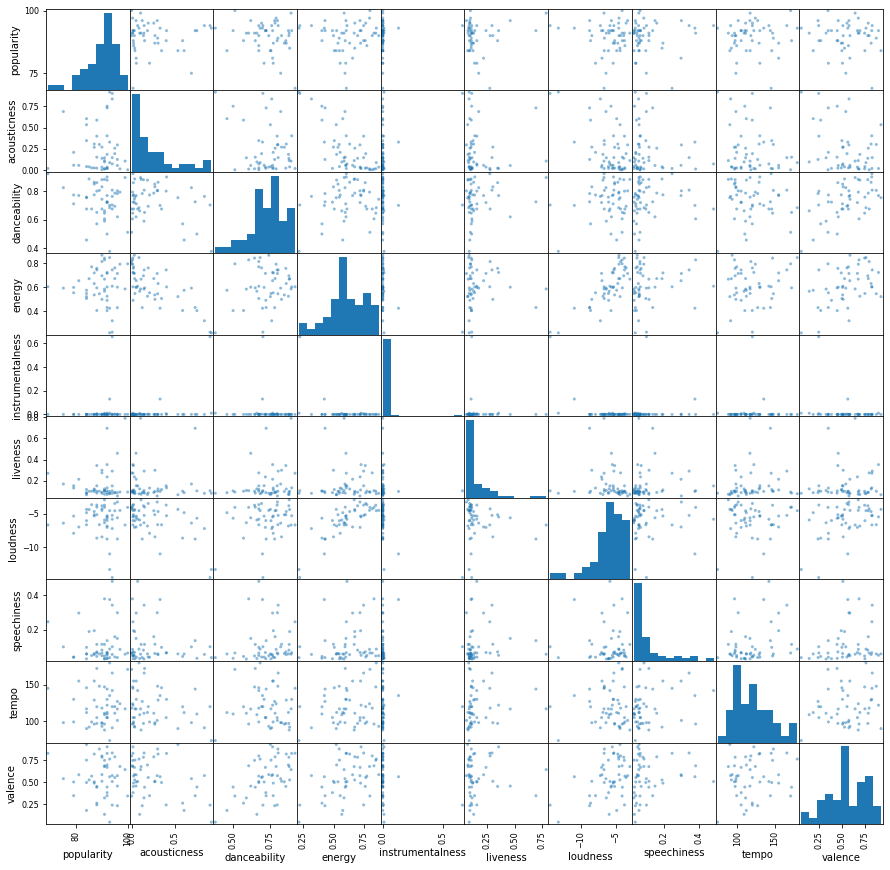

In [297]:
scatter_matrix(df)
plt.gcf().set_size_inches(15, 15)
plt.show()


From visualization above I will take some example to analyze relationship between variable :
* `Loudness and Energy` : loudness and energy have a positive relationship, it can be defined by distribution of the data inside matrix. The higher values of loudness, more energetic the song is.
* `Popularity and Energy` : there are no significant relationship between popularity and energy
* `Popularity and Danceability` : popularity and danceability have negative relationship, it's mean the higher values of danceability, less popular the song is.
* `Liveness and Tempo` : liveness and tempo have unsignificant positive relationship.

<h4>Get Correlation Between Variable</h4>

<div style="text-align:justify">After we get information of relationship between variables through the matrix, we need to analyze how strong the relationship is. The strength of the relationship between variables can be seen from correlation values. High positif correlation values indicate that there are strong positive relationship between the two variables. And high negative correlation values indicate that there are strong negatif relationship between the two variables. Zero correlation values means there are no relationship between two variables.</div>

In [298]:
pd.set_option('precision', 3)
correlation=df.corr(method='spearman')
print(correlation)

                  popularity  acousticness  danceability  energy  \
popularity             1.000        -0.018        -0.130   0.048   
acousticness          -0.018         1.000        -0.002  -0.687   
danceability          -0.130        -0.002         1.000   0.078   
energy                 0.048        -0.687         0.078   1.000   
instrumentalness       0.162         0.009        -0.084   0.172   
liveness              -0.131        -0.170         0.125   0.086   
loudness              -0.026        -0.371         0.032   0.741   
speechiness            0.084        -0.066         0.276   0.249   
tempo                  0.124        -0.167        -0.141   0.136   
valence               -0.031        -0.264         0.470   0.407   

                  instrumentalness  liveness  loudness  speechiness  tempo  \
popularity                   0.162    -0.131    -0.026        0.084  0.124   
acousticness                 0.009    -0.170    -0.371       -0.066 -0.167   
danceability     

<Figure size 864x864 with 0 Axes>

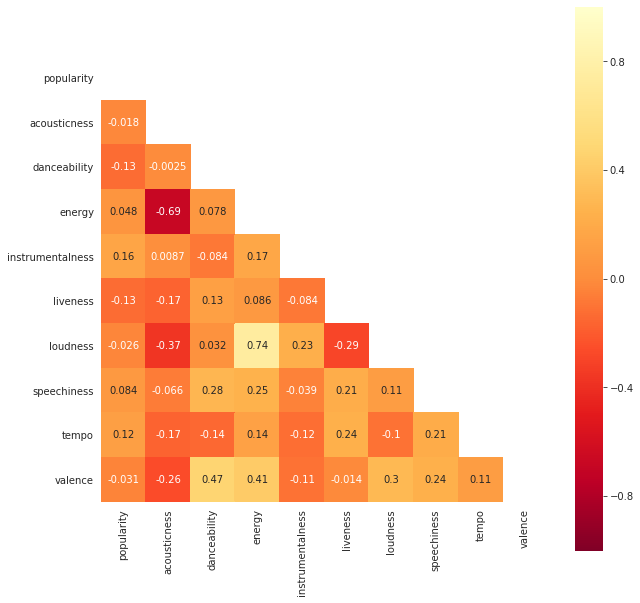

In [299]:
# heatmap of the correlation 
plt.figure(figsize=(12,12))
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(correlation, mask=mask, square=True,annot=True,vmin=-1,vmax=1,cmap="YlOrRd_r")


<div style="text-align:justify">Previously on the scatter matrix visualization above I've given a little explanation about direction relationship between variable. Actually scatter matrix and correlation plot shown the same information, but spesifically, correlation plot will giving strengthness relationship value between variable. For example :</div>

* `Loudness and Energy` : Have strong positive relationship. They have correlation value of 0.74 (approaching the maximum positive value)
* `Energy and Acousticness` : Have strong negative relationship.They have correlation value of -0.69 (approaching the maximum negative value)

<h4>Comparing Top 5 Song Based on Song's Features</h4>

In this step, we will get Top 5 popular song and comparing song features attribute in each others.

In [300]:
#scale features attributes in range 0-1
factors = ['acousticness', 'energy', 'danceability',
           'instrumentalness','liveness','loudness','speechiness','tempo','valence']

new_max = 1
new_min = 0
new_range = new_max - new_min


for factor in factors:
    max_val = df[factor].max()
    min_val = df[factor].min()
    val_range = max_val - min_val
    df[factor] = df[factor].apply(
      lambda x: (((x - min_val) * new_range) / val_range) + new_min)

In [301]:
df.head(5)

,song_name,artist_name,release_date,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Blinding Lights,The Weeknd,2019-11-29,100,0.000,0.245,0.889,0.000,0.050,0.903,0.078,0.917,0.336
1,The Box,Roddy Ricch,2019-12-06,99,0.112,0.950,0.565,0.000,1.000,0.676,0.062,0.408,0.676
2,Dance Monkey,Tones And I,2019-05-10,75,0.750,0.820,0.576,0.000,0.154,0.700,0.157,0.231,0.559
3,Don't Start Now,Dua Lipa,2019-10-31,97,0.012,0.762,0.884,0.000,0.052,0.864,0.125,0.474,0.716
4,Intentions (feat. Quavo),Justin Bieber,2020-02-14,89,0.326,0.785,0.504,0.000,0.061,0.680,0.066,0.700,0.942


In [302]:
pd.set_option('display.float_format',lambda x: '%.3f'% x)

In [303]:
df_top = df.sort_values(by='popularity', ascending=False)[:5]

In [304]:
df_top

,song_name,artist_name,release_date,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Blinding Lights,The Weeknd,2019-11-29,100,0.000,0.245,0.889,0.000,0.050,0.903,0.078,0.917,0.336
1,The Box,Roddy Ricch,2019-12-06,99,0.112,0.950,0.565,0.000,1.000,0.676,0.062,0.408,0.676
3,Don't Start Now,Dua Lipa,2019-10-31,97,0.012,0.762,0.884,0.000,0.052,0.864,0.125,0.474,0.716
6,Falling,Trevor Daniel,2018-10-05,96,0.133,0.744,0.325,0.000,0.043,0.496,0.019,0.504,0.211
7,Tusa,KAROL G,2019-11-07,96,0.321,0.779,0.764,0.000,0.000,0.972,0.596,0.259,0.598


In [305]:
df_new = df_top[['song_name','acousticness', 'danceability', 'energy', 'liveness', 'loudness','speechiness','tempo','valence']]

In [306]:
df_new.set_index('song_name',inplace = True)

In [307]:
df_new

,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
song_name,,,,,,,,
Blinding Lights,0.000,0.245,0.889,0.050,0.903,0.078,0.917,0.336
The Box,0.112,0.950,0.565,1.000,0.676,0.062,0.408,0.676
Don't Start Now,0.012,0.762,0.884,0.052,0.864,0.125,0.474,0.716
Falling,0.133,0.744,0.325,0.043,0.496,0.019,0.504,0.211
Tusa,0.321,0.779,0.764,0.000,0.972,0.596,0.259,0.598


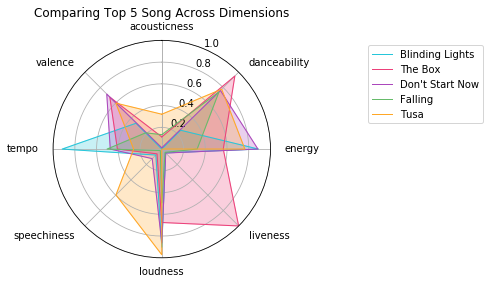

In [308]:
from math import pi

labels = ['acousticness', 'danceability', 'energy', 'liveness', 'loudness','speechiness','tempo','valence']
num_vars = len(labels)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]

angles += angles[:1]
ax = plt.subplot(111, polar=True)

def add_to_radar(song, color):
    values = df_new.loc[song].tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, label=song)
    ax.fill(angles, values, color=color, alpha=0.25)
    
add_to_radar("Blinding Lights", '#26C6DA')
add_to_radar("The Box", '#EC407A')
add_to_radar("Don't Start Now", '#AB47BC')
add_to_radar("Falling", '#66BB6A')
add_to_radar("Tusa", '#FFA726')

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles), labels)


for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')


ax.set_ylim(0, 1)

ax.set_rlabel_position(180 / num_vars)

ax.set_title('Comparing Top 5 Song Across Dimensions', y=1.08)
 
ax.legend(loc='upper right', bbox_to_anchor=(2, 1))


Visualization above shown that :
* Blinding Lights have highest tempo from others, which mean that this song have fast rhythm. 
* The Box have highest value in danceability and liveness, which mean that this song recorded from live performance and more dancing able from others.
* Don't start now have high value in energy and loudness, which mean that this song is very energetic.
* Falling have high value in danceability, loudness, and energy
* Tusa have highest value in loudness but less value and tempo

# Conclusion

From the analysis above we can conclude that :
1. Bad Bunny is the most popular artist in this early year 
2. People like listening to Blinding Lights from The Weeknd
3. Danceability, energy, and some other song features doesn't giving affect in popularity levels
4. Almost of top 5 popular song have same characteristic value in danceability, energy, valance, and loudness. They have high value in those attributes. It's mean that in this early year people like to listening kind of music which more energetic and attractive